### Import Packages

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Scikit learn library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import Accuracy Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Pickle To Save And Load Models
import pickle
from sklearn.externals import joblib

### Global Variables

In [40]:
# Create Global Variables If Necessay
projectName = 'PUBGPrediction'
dataPath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/PUBG Chicken Dinner Prediction/Data/'
modelSavePath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/PUBG Chicken Dinner Prediction/'

### Custom Functions

In [41]:
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Preprocessing

In [42]:
# Reading The Dataset
df = pd.read_csv(dataPath + 'train_V2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [45]:
# CHECK FOR NAN VALUE IN THE DATA FRAME
for col in list(df.columns):
    # Display Columns With Null Values 
    if df[col].isnull().sum() > 0:
        print(("%s : %d")%(col, df[col].isnull().sum()))
    
        # Drop Columns With Huge Null Values
        if df[col].isnull().sum() > 1000:
            df.drop([col], axis=1, inplace=True)
    
        # Else Handle The Null Value Based On The Data Type
        else:
            if df[col].dtype == 'object':
                df[col].fillna('NA', inplace = True)
            if df[col].dtype == 'int64':
                df[col].fillna(0, inplace = True)
            if df[col].dtype == 'float64':
                df[col].fillna(0.0, inplace = True)
        
df.info()

winPlacePerc : 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [47]:
'''# Get The Number Of Unique Values From Each Column and Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
for col in list(df.columns):
    if len(df[col].unique()) < 100:
        df[col] = labelencoder_df.fit_transform(df[col])'''

# Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['matchType'] = labelencoder_df.fit_transform(df['matchType'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          int32
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int32(1), int64(19), object(3)
memory usage: 966.9+ MB


### Feature Selection Using Pearson Correlation

In [49]:
# DROPPING UNWANTED COLUMNS
df.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)

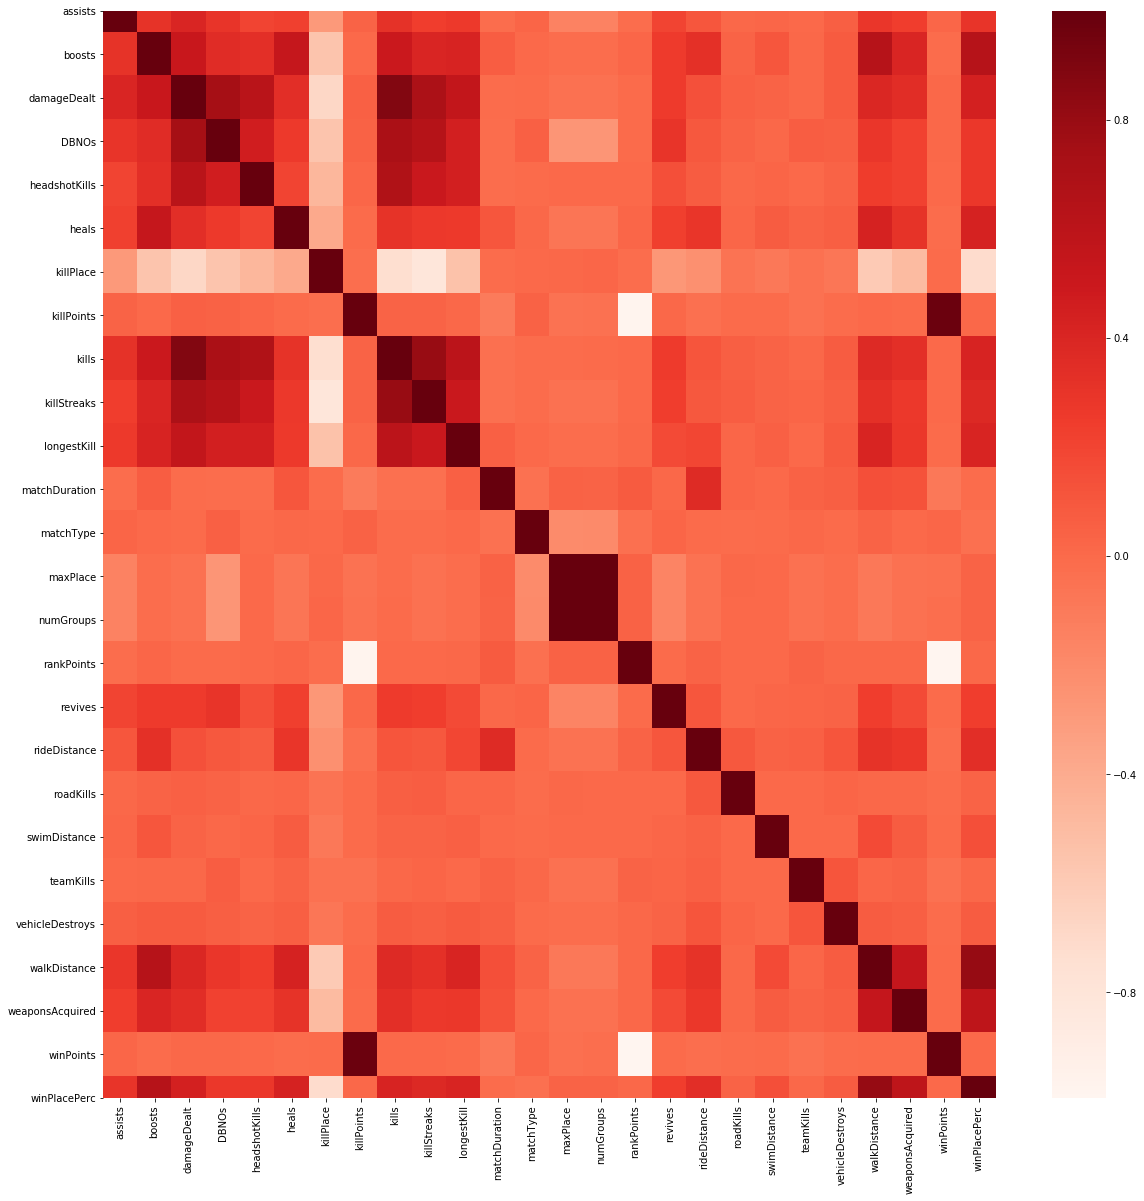

In [50]:
# Compute Pearson Correlation
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor['winPlacePerc'])

# Plot Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [51]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
print(relevant_features)

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277723
heals              0.427857
killPlace          0.719068
killPoints         0.012908
kills              0.419916
killStreaks        0.377567
longestKill        0.410154
matchDuration      0.005169
matchType          0.028514
maxPlace           0.037378
numGroups          0.039621
rankPoints         0.013522
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64


### Testing and Training Data

In [52]:
#SEPERATE LABEL COLUMN FROM FEATURE COLUMNS
df_label = df['winPlacePerc'].values
df.drop(['winPlacePerc'], axis=1, inplace=True)
df_feature = df[['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints',
                 'kills','killStreaks','longestKill','matchDuration','matchType','maxPlace','numGroups','rankPoints',
                 'revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance',
                 'weaponsAcquired','winPoints']].values

#SPLIT TRAINING SET AND TESTING SET
from sklearn.model_selection._split import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(df_feature, df_label, test_size=0.20)

### Data Modeling

In [54]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model_LinerRegression = LinearRegression()
model_LinerRegression.fit(feature_train,label_train)
predicted_values_LinerRegression = model_LinerRegression.predict(feature_test)

### Meassure Accuracy

In [55]:
# Meassure Accuracy Using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_LinerRegression = sqrt(mean_squared_error(label_test, predicted_values_LinerRegression))
#rmse_LogisticRegression = sqrt(mean_squared_error(label_test, predicted_values_LogisticRegression))

print(rmse_LinerRegression)
#print(rmse_LogisticRegression)

0.12602424513381283


### Plot Actual Vs Predicted Data

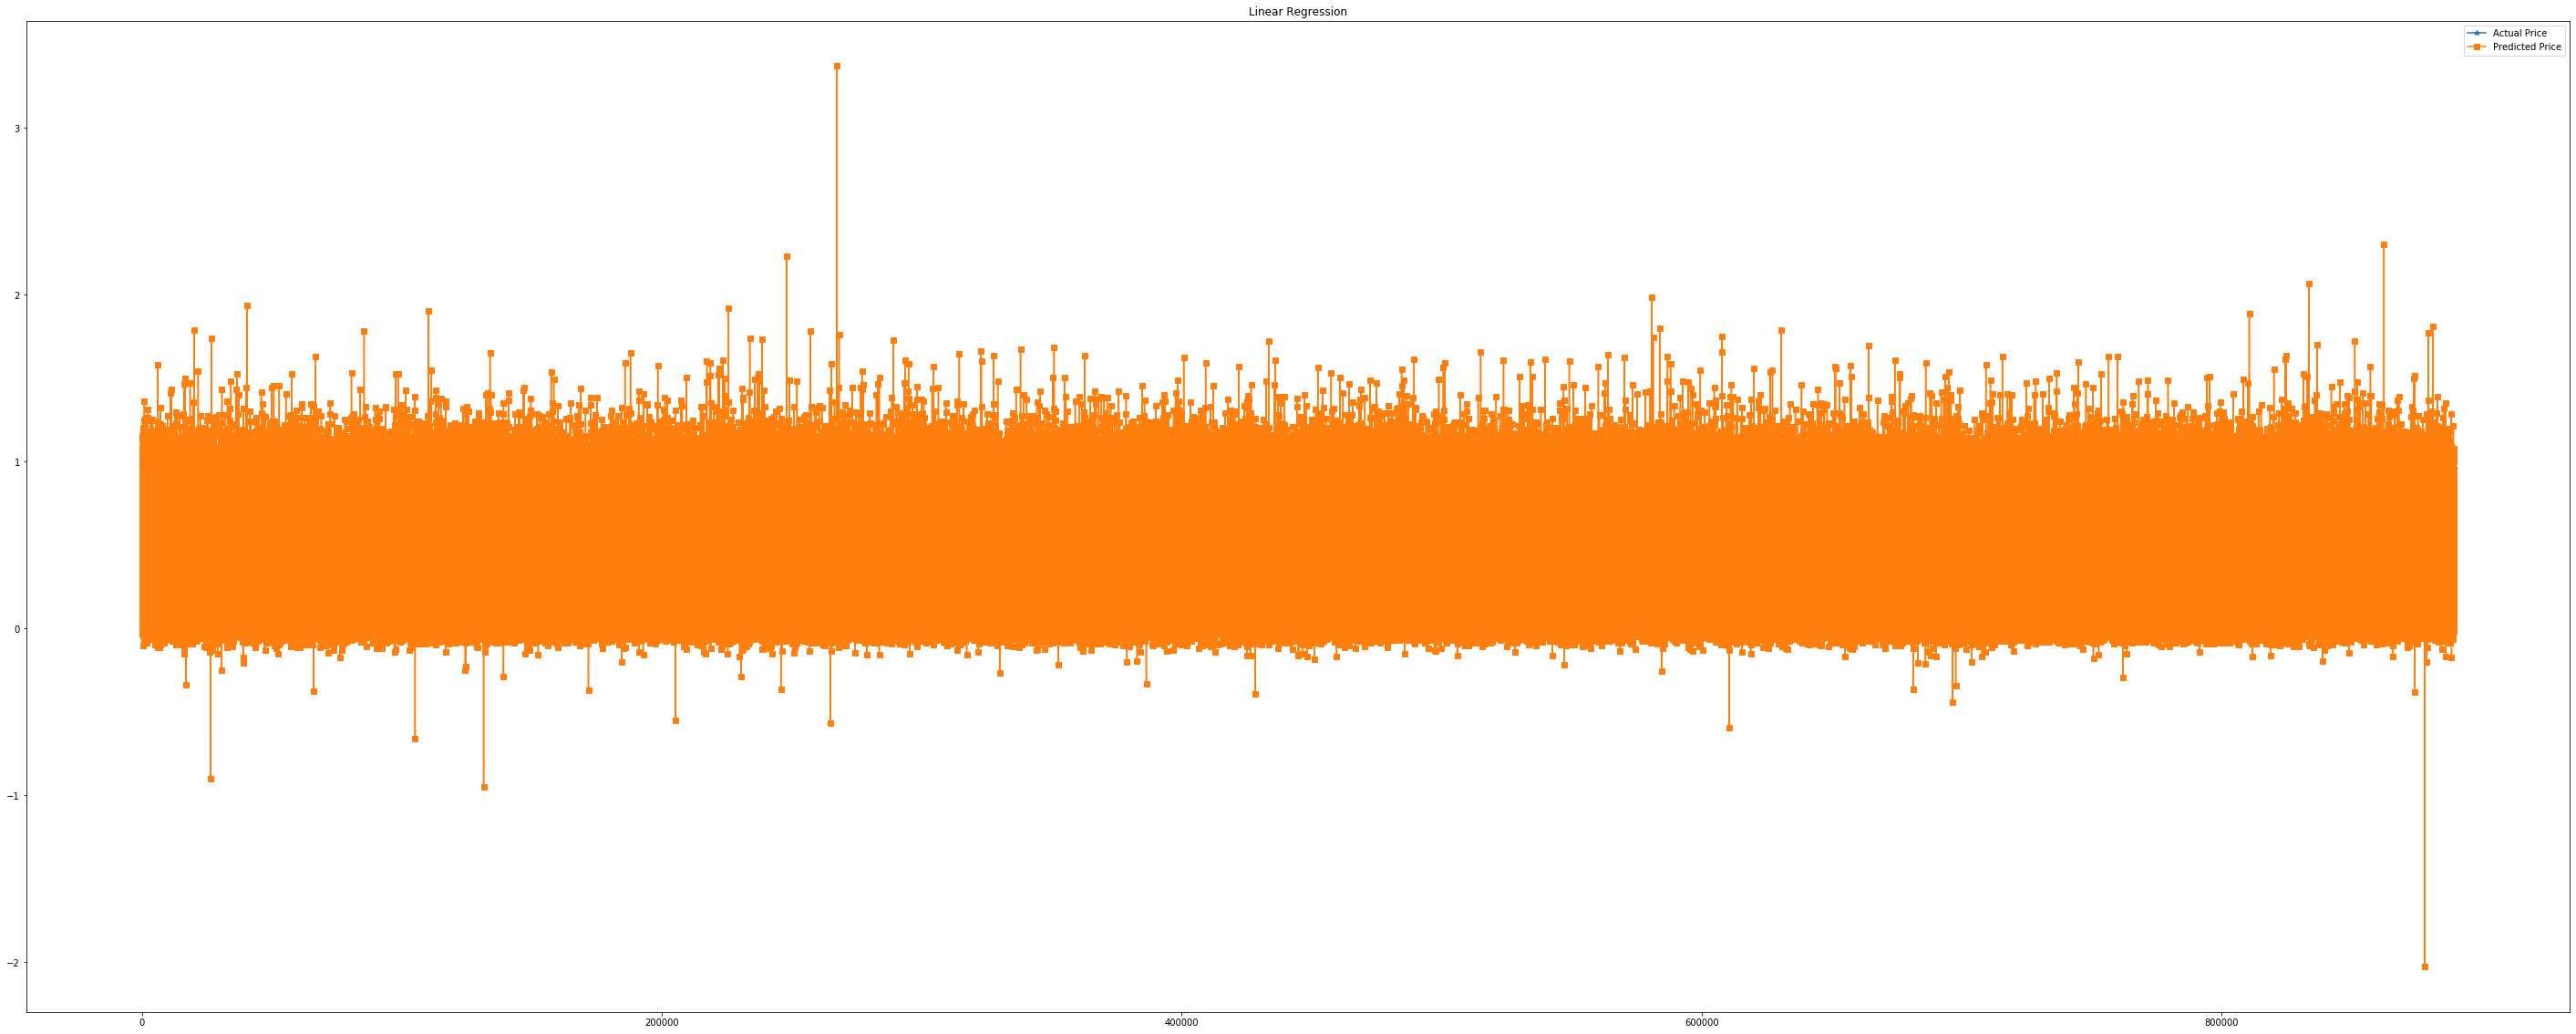

In [59]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,1, figsize = (50,20))
x = np.arange(1,len(label_test)+1)
ax1.plot(x, label_test, marker = '*', label = 'Actual Price')
ax1.plot(x, predicted_values_LinerRegression, marker = 's' , label = 'Predicted Price')
ax1.set_title('Linear Regression')

plt.legend()
plt.show()

### Save Model

In [60]:
# Save The Models Performing Well As A Pickle String. 
save_Model_LinerRegression = pickle.dumps(model_LinerRegression)

# Save The Pickle Model In A File 
joblib.dump(save_Model_LinerRegression, modelSavePath + projectName + '_LinerRegression_Model.pkl')

['D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/PUBG Chicken Dinner Prediction/PUBGPrediction_LinerRegression_Model.pkl']

### Make Single Predictions

In [23]:
# Load the pickled model 
load_Model_LinerRegression = joblib.load(modelSavePath + projectName + '_LinerRegression_Model.pkl')
load_Model_LogisticRegression = joblib.load(modelSavePath + projectName + '_LogisticRegression_Model.pkl')
  
# Use the loaded pickled model to make predictions 
#load_Model_LinerRegression.predict(X_test)
#load_Model_LogisticRegression.predict(X_test)